# 다중 출력 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값을 갖는 경우
- 회귀와 분류
 - (회귀)출력이 벡터 형태로 다수의 아나로그 값을 갖는 경우
 - (분류)출력이 남여 구분이 아니라 국적 구분도 해야 하는 경우(multi-class output)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import scipy.stats
from numpy.random import rand, randn

## 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수

In [3]:
def get_random_x(n_steps=30):
    level = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    x = scipy.stats.norm(3, 1) # 평균 3, 표준편차가 1의 정규 분포형태의 신호 생성
    xs = np.linspace(0,6,n_steps)
    in_x = level*(x.pdf(xs))
    return in_x

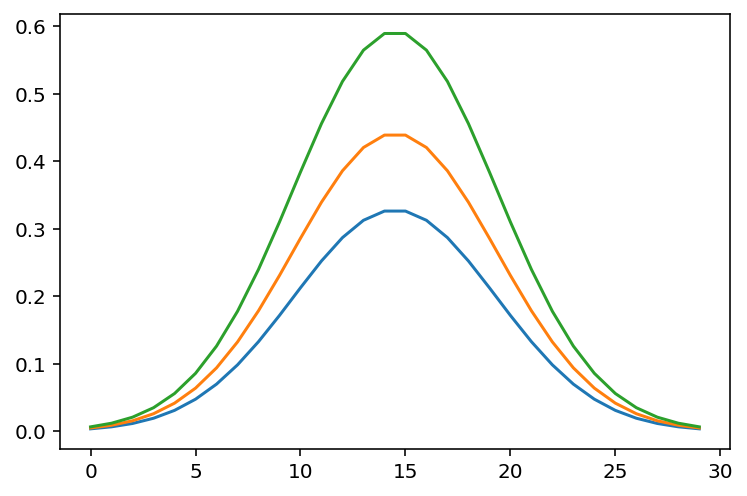

In [21]:
# 랜덤한 입력 신호 생성
plt.plot(get_random_x())
plt.plot(get_random_x())
plt.plot(get_random_x())

In [29]:
get_random_x()

array([0.00586759, 0.01068382, 0.01863816, 0.03115222, 0.04988665,
       0.07654013, 0.11251323, 0.15846287, 0.21382621, 0.27644191,
       0.34241779, 0.40636686, 0.46205082, 0.50335076, 0.5253651 ,
       0.5253651 , 0.50335076, 0.46205082, 0.40636686, 0.34241779,
       0.27644191, 0.21382621, 0.15846287, 0.11251323, 0.07654013,
       0.04988665, 0.03115222, 0.01863816, 0.01068382, 0.00586759])

In [62]:
# 임의의 출력을 얻는 함수 (4개를 얻는다고 가정) 
def get_4_y(x):
    y1 = x.sum() + 0.2*randn()
    y2 = (x**2).sum() + 0.2*randn()
    y3 = (x**3).sum() + 0.2*randn()
    y4 = (x**4).sum() + 0.2*randn()
    return y1, y2, y3, y4

In [63]:
sample = get_random_x()
print('X=', sample)
print('y=',get_4_y(sample))

X= [0.00457177 0.00832436 0.01452203 0.02427243 0.03886947 0.05963668
 0.08766533 0.12346726 0.16660393 0.2153913  0.2667968  0.31662308
 0.36000956 0.39218864 0.40934124 0.40934124 0.39218864 0.36000956
 0.31662308 0.2667968  0.2153913  0.16660393 0.12346726 0.08766533
 0.05963668 0.03886947 0.02427243 0.01452203 0.00832436 0.00457177]
y= (4.811744791744085, 1.5030852322709716, 0.6925549565391486, -0.0578810880418964)


In [64]:
# 샘플 데이터 X, y 생성
N = 200
samples = []
multi_y = []
for i in range(N):
    x = get_random_x()
    samples.append(x)
    multi_y.append(get_4_y(x))
X = np.array(samples)
y = np.array(multi_y)

In [65]:
X.shape, y.shape

((200, 30), (200, 4))

In [66]:
X[:3], y[:3]

(array([[0.00378588, 0.0068934 , 0.01202569, 0.0201    , 0.0321878 ,
         0.04938514, 0.07259566, 0.10224323, 0.1379647 , 0.17836553,
         0.22093441, 0.26219556, 0.2981239 , 0.3247714 , 0.33897546,
         0.33897546, 0.3247714 , 0.2981239 , 0.26219556, 0.22093441,
         0.17836553, 0.1379647 , 0.10224323, 0.07259566, 0.04938514,
         0.0321878 , 0.0201    , 0.01202569, 0.0068934 , 0.00378588],
        [0.00569951, 0.01037777, 0.01810425, 0.03025982, 0.04845758,
         0.07434755, 0.10929015, 0.15392351, 0.2077009 , 0.26852289,
         0.33260881, 0.39472598, 0.44881481, 0.48893166, 0.51031537,
         0.51031537, 0.48893166, 0.44881481, 0.39472598, 0.33260881,
         0.26852289, 0.2077009 , 0.15392351, 0.10929015, 0.07434755,
         0.04845758, 0.03025982, 0.01810425, 0.01037777, 0.00569951],
        [0.00621452, 0.01131552, 0.01974017, 0.03299414, 0.05283627,
         0.08106568, 0.11916575, 0.16783223, 0.22646901, 0.29278696,
         0.36266377, 0.43039392,

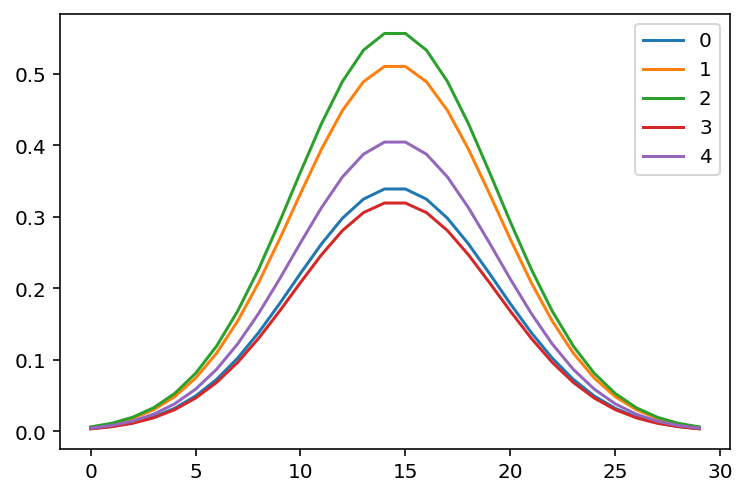

In [67]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

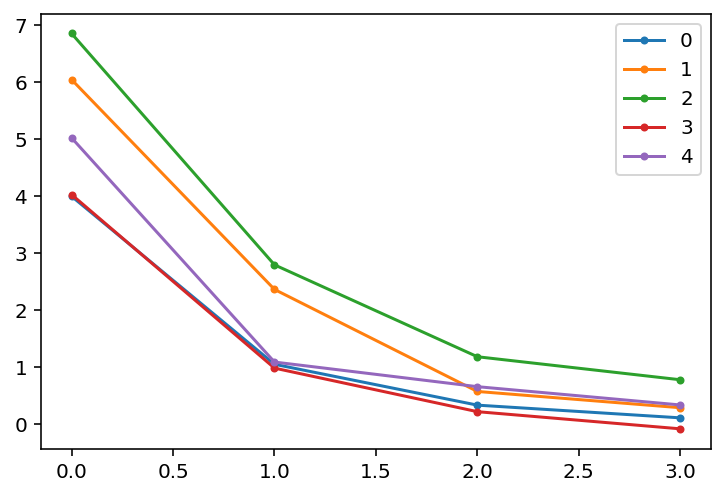

In [68]:
for i in range(5):
    plt.plot(y[i], label=str(i), marker='.')
    plt.legend()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 목적 변수에 4개의 컬럼(y1, y2, y3, y4) 이 있다
- 각 컬럼별로 r2 구하기

In [71]:
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred, multioutput="raw_values")

array([0.95478446, 0.90506852, 0.54227045, 0.25195787])

In [72]:
# 과제: 노이지가 많아서 y를 생성할 때 노이지 레벨을 0.1 --> 0.2 로 바꾸어본다.
# 실제값과 예측치를 비교해서 그려보시오 (y_test, y_pred 비교): 4개가 있다!

In [82]:
y_test.shape

(50, 4)

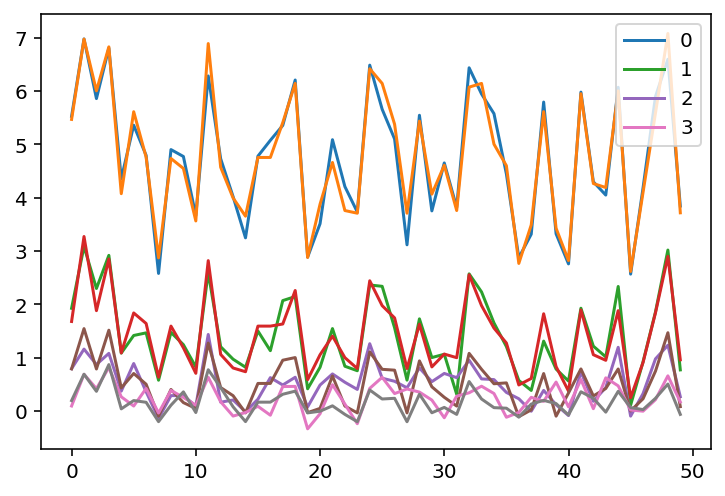

In [81]:
for i in range(4):
    plt.plot(y_test[:,i], label=str(i))
    plt.plot(y_pred[:,i])
plt.legend()

In [73]:
r2_score(y_test, y_pred, multioutput="raw_values").mean()

0.6635203242066118

In [61]:
y_test

array([[ 2.67298265e+00,  7.07436175e-01,  1.21031156e-01,
        -4.55311932e-02],
       [ 6.07578207e+00,  2.15500034e+00,  8.00574429e-01,
         2.84685818e-01],
       [ 4.19256456e+00,  9.92225206e-01,  8.16536830e-02,
        -2.67946244e-02],
       [ 4.71890596e+00,  1.38839745e+00,  5.07109083e-01,
         2.86452147e-01],
       [ 3.56919876e+00,  7.03861106e-01,  2.52961023e-01,
        -6.80134605e-02],
       [ 6.82300164e+00,  2.69693805e+00,  1.37750656e+00,
         5.13036138e-01],
       [ 4.43731076e+00,  1.24697787e+00,  2.22123415e-01,
        -2.00935244e-04],
       [ 3.33642645e+00,  6.27034437e-01,  1.56595333e-01,
        -2.06688899e-03],
       [ 6.38092548e+00,  2.52557718e+00,  1.09043132e+00,
         4.71581118e-01],
       [ 2.75191608e+00,  4.72150567e-01, -8.87795417e-02,
        -1.08845417e-01],
       [ 7.23813636e+00,  3.09946095e+00,  1.57149211e+00,
         7.74352205e-01],
       [ 6.05432927e+00,  2.22433577e+00,  8.56198079e-01,
      

In [60]:
y_pred

array([[ 2.51842943e+00,  3.74998825e-01, -1.06782616e-03,
        -9.35067503e-04],
       [ 6.11585884e+00,  2.09258089e+00,  8.92205037e-01,
         3.52331282e-01],
       [ 4.12778941e+00,  9.73538917e-01,  2.35902570e-01,
         1.80581041e-01],
       [ 4.85114516e+00,  1.36281700e+00,  5.63528594e-01,
         1.12154017e-01],
       [ 3.71979707e+00,  6.48097958e-01,  1.35850373e-01,
         4.13077376e-02],
       [ 6.68972343e+00,  2.65783493e+00,  1.22220884e+00,
         5.81490694e-01],
       [ 4.59408459e+00,  1.20508310e+00,  3.20039804e-01,
        -3.93647147e-02],
       [ 3.20251780e+00,  6.25209313e-01,  8.63813328e-02,
         4.75688094e-02],
       [ 6.49282223e+00,  2.39086320e+00,  8.81941292e-01,
         6.08513856e-01],
       [ 2.71569594e+00,  4.52062660e-01,  1.73185685e-01,
         4.64019766e-02],
       [ 7.24516446e+00,  3.08131926e+00,  1.54669991e+00,
         8.51320920e-01],
       [ 6.21214044e+00,  2.19218070e+00,  7.76957309e-01,
      

In [59]:
# 컬럼별 r2의 평균을 보여준다
r2_score(y_test, y_pred)

0.9153925512308146

# 다중 분류
- multi-class output 모델
- y로 단일 값이 아니라 아래와 같이 다중 값을 사용
 - multi_y = np.c_[y1, y2] 또는
 - multi_y = np.stack((y1,y2)).T 사용